<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>Computational Mathematics, year 1, semester 2</center>
<center>Author: Aya Hankir and Benjamin Montagnes</center>

# Project: Stationary convection-Diffusion equation


## Table of contents

- [Introduction](#intro)
- [Diffusion](#diffusion)
- [Convection-diffusion equation](#convection)
- [Other ideas...](#other)

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import random

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

<a id="intro"></a>
## Introduction

<div markdown=1 class=Abstract> 
The objective of the project is to study the stationary convection-diffusion equation and
to experiment different methods to solve the problem.

The scalar convection diffusion equation is given by the following a partial differential
equation:

$$\frac{du}{dt}(x,t)+V \frac{du}{dx}(x,t)-a \frac{d^2u}{dx^2}(x,t)=f(x,t) \, \forall (x,t) \in I \times \mathbb{R}$$

where $u$ is the quantity of interest, $V$ is the velocity field due to convection, $a$ is the (positive) diffusion coefficient and $f$ is a source term.

For example, this equation can represent the evolution of the concentration $u(x,t)$ of a pollutant at location $x$ and time $t$, where $V$ is the velocity of the wind and $f$ represents a local source of pollutant.

If $f = f(x)$, we can consider the stationary state solutions: distributions not depending on time $(u = u(x))$ and satisfying the scalar ordinary differential equation:

$$V \frac{du}{dx}(x)-a \frac{d^2u}{dx^2}(x) = f(x) \, \forall x \in I$$

The objective of the project is to understand the influence of the different terms of this
equation and to study numerical schemes to solve it.


<a id="diffusion"></a>
## Diffusion

### Physical sense

In [3]:
def K(x,t):
    return (np.e)**((-abs(x)**2)/(4*a*t))*1/((4*np.pi*a*t)**0.5)


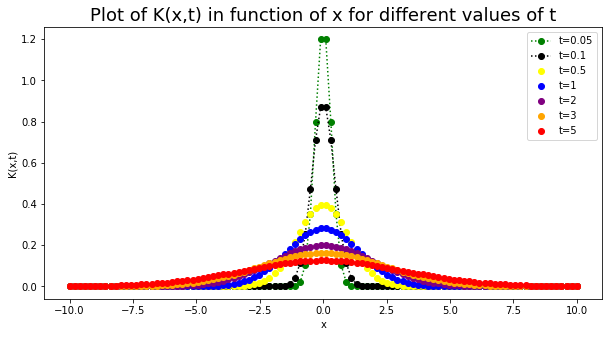

In [4]:
a=1
x=np.linspace(-10,10,100)

fig = plt.figure(figsize=(10, 5))

t=0.05
plt.plot(x, K(x,t), marker="o", color='green',label='t='+str(t),linestyle=':')

t=0.1
plt.plot(x, K(x,t), marker="o", color='black',label='t='+str(t),linestyle=':')

t=0.5
plt.plot(x, K(x,t), marker="o", color='yellow',label='t='+str(t),linestyle='')

t=1
plt.plot(x, K(x,t), marker="o", color='blue',label='t='+str(t),linestyle='')

t=2
plt.plot(x, K(x,t), marker="o", color='purple',label='t='+str(t),linestyle='')

t=3
plt.plot(x, K(x,t), marker="o", color='orange',label='t='+str(t),linestyle='')

t=5
plt.plot(x, K(x,t), marker="o", color='red',label='t='+str(t),linestyle='')

plt.xlabel('x')
plt.title('Plot of K(x,t) in function of x for different values of t', fontsize = 18)
plt.ylabel('K(x,t)')
plt.legend(fontsize=10)
plt.show()

<div  markdown=1 class="Rmk"> We can see that for a very small $t$, all the particles are concentrated in one point at x=0 , and as $t$ grows, the particles spread around the center

<div  markdown=1 class="Rmk"> We now want to study the influence of $a$:

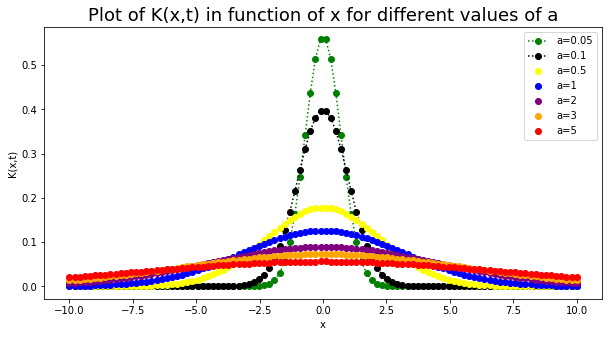

In [5]:
t=5
x=np.linspace(-10,10,100)

fig = plt.figure(figsize=(10, 5))

a=0.05
plt.plot(x, K(x,t), marker="o", color='green',label='a='+str(a), linestyle=':')

a=0.1
plt.plot(x, K(x,t), marker="o", color='black',label='a='+str(a),linestyle=':')

a=0.5
plt.plot(x, K(x,t), marker="o", color='yellow',label='a='+str(a),linestyle='')

a=1
plt.plot(x, K(x,t), marker="o", color='blue',label='a='+str(a),linestyle='')

a=2
plt.plot(x, K(x,t), marker="o", color='purple',label='a='+str(a),linestyle='')

a=3
plt.plot(x, K(x,t), marker="o", color='orange',label='a='+str(a),linestyle='')

a=5
plt.plot(x, K(x,t), marker="o", color='red',label='a='+str(a),linestyle='')

plt.xlabel('x')
plt.title('Plot of K(x,t) in function of x for different values of a', fontsize = 18)
plt.ylabel('K(x,t)')
plt.legend(fontsize=10)
plt.show()

<div  markdown=1 class="Rmk"> We can thus see that $a$ has the same influence as $t$.

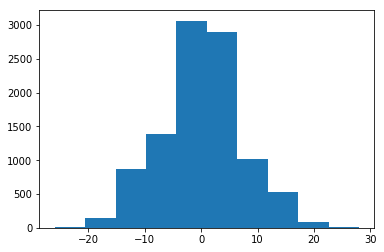

[6, 0, -4, -10, -4, 14, 10, -2, -12, 12, 8, 8, -2, 0, -2, -8, -2, -4, 6, 6, -8, 0, -16, -4, -6, -2, -10, 2, -6, 0, -6, -8, -8, 10, 12, 2, -2, 0, 0, -12, 2, 14, -6, 6, -12, 4, -2, -8, -12, 8, 12, 2, 0, -2, -6, 8, -6, 2, 0, 12, 4, 4, -8, 8, -8, 6, 14, -4, 12, 2, 2, -2, 2, 6, 8, 0, 6, -8, -2, 4, 2, 2, 2, -10, 4, 4, 0, 0, -4, 4, -10, -2, -2, 4, 2, 4, 0, -8, -6, 0, -4, 16, 2, 16, 16, -8, 2, -10, 6, -2, 2, 4, -8, 6, -4, 14, -4, 8, 2, 8, 0, -2, -8, -2, -12, -14, -4, -4, 8, -12, 0, 10, 4, 6, -2, 0, -6, 0, -2, 8, 2, 0, 4, -12, 6, -6, 4, 6, 6, 2, -4, 2, -18, -6, -2, 4, -8, -4, -2, -10, -2, -10, -2, 12, -18, 10, 8, 8, -18, -6, 6, 4, 2, -8, 2, 8, -4, 0, 2, 8, 0, 8, -4, 0, 6, 6, 4, 6, 8, 6, 4, 4, -6, -6, 12, -8, -2, 2, 0, 12, -4, 12, 10, -2, 16, 10, 0, -20, 2, 8, -4, -16, -4, 6, 2, -8, 4, 16, 12, 10, 10, -2, -2, -10, -8, 10, 10, 6, -4, 2, -8, 2, 6, -12, 6, 2, 2, 2, -2, 4, -8, 0, -8, 4, -8, 4, 2, 0, -2, 0, 8, 8, -8, 0, -4, 8, -8, -2, 16, -6, -12, 6, -10, -8, -6, 2, 0, 2, 8, 2, 12, 10, -10, 0, -10, 2

In [6]:
step=50
nb_points=10000

a=[0]*nb_points
for i in range(step):
    for j in range(nb_points):
        r= random.random()
        if r>=0.5: a[j]=a[j]-1
        else: a[j]=a[j]+1
plt.hist(a)
plt.show()
print(a)

<div  markdown=1 class="Rmk"> We can see that the more points we have the more our histogram looks like a parabola similar to $K(x,t)$.

### Discretization of the second derivative

<div  markdown=1 class="Rmk">
Justification of the approximation:
We recall that the general formula for the first derivation is $\approx \frac{f(x+h)-f(x)}{h}$

We thus get:

$$u''(x_i) \approx \frac{u'(ih+\frac{h}{2}) - u'(ih - \frac{h}{2})}{h}$$

$$\approx \frac{1}{h} \cdot (\frac{u(ih+h)-u(ih)}{h}-\frac{u(ih)-u(ih-h)}{h})$$

$$\approx \frac{u(ih + h)-2 \cdot u(ih) + u(ih -h)}{h^2}$$

$$\approx \frac{u(h(i+1))-2 \cdot u(ih) + u(h(i-1))}{h^2}$$

$$\approx \frac{u_{i+1}-2u_i + u_{i-1}}{h^2}$$

<div  markdown=1 class="Rmk">
We search for two matrices A and B in order to determine the vector U. We thus have:

$$
U=
\begin{pmatrix}
u_1 \\
\vdots \\
u_N
\end{pmatrix}
$$

$$
A=
\begin{pmatrix}
\frac{2}{h^2} & -\frac{1}{h^2} & 0 & 0 & \cdots & 0 & 0 \\
-\frac{1}{h^2} & \frac{2}{h^2} & -\frac{1}{h^2} & 0 & \cdots & 0 & 0 \\
0 & -\frac{1}{h^2} & \frac{2}{h^2} & -\frac{1}{h^2} & \cdots & 0 & 0 \\
\vdots &&& \ddots &&& \vdots \\
0 & 0 & 0 & 0 & \cdots & -\frac{1}{h^2} &\frac{2}{h^2}
\end{pmatrix}
$$

$$
B=
\begin{pmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_N)
\end{pmatrix}
$$

In [7]:
'''We use the method to approximate'''
def approx(f,n):
    h=1/(n+1)
    A = (1/h**2)*(np.diag([2]*(n),0)+np.diag([-1]*(n-1),-1)+np.diag([-1]*(n-1),1))
    B = np.zeros(n)
    for i in range(n):
        B[i]=f((i+1)/(n+1))
    return np.linalg.inv(A)@B

def f(x):
    return np.pi**2*np.sin(np.pi*x)

print(approx(f,10))

[ 0.2836554   0.54433072  0.76090761  0.91584029  0.99657703  0.99657703
  0.91584029  0.76090761  0.54433072  0.2836554 ]


In [8]:
'''We know the second primitive of f in order to compute the exact value:'''
def F(x):
    return np.sin(np.pi*x)

In [9]:
'''We thus have the exact value for u:'''
def exact(f,n):
    u=np.zeros(n)
    for i in range(n): u[i]=f((i+1)/(n+1))
    return u

print(exact(F,10))

[ 0.28173256  0.54064082  0.75574957  0.909632    0.98982144  0.98982144
  0.909632    0.75574957  0.54064082  0.28173256]


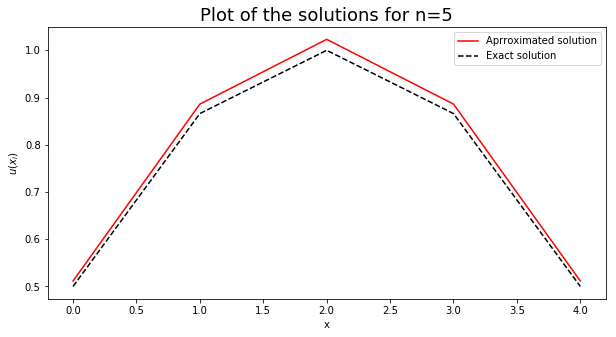

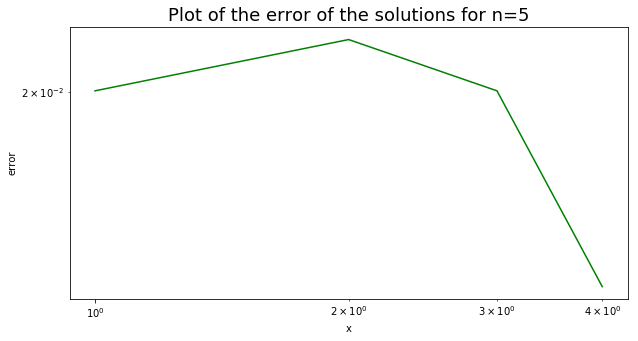

Maximum error : 0.0231629187631


In [10]:
n=5
x=np.arange(0, n)

#plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x, approx(f,n), color='red', label='Aprroximated solution')
plt.plot(x, exact(F,n), color='black', linestyle='--', label='Exact solution')
plt.xlabel('x')
plt.title('Plot of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('$u(x_i)$')
plt.legend(fontsize=10)
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.loglog(x, abs(exact(F,n)-approx(f,n)), color='green')
plt.xlabel('x')
plt.title('Plot of the error of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('error')
plt.show()

print('Maximum error :',max(abs(exact(F,n)-approx(f,n))))

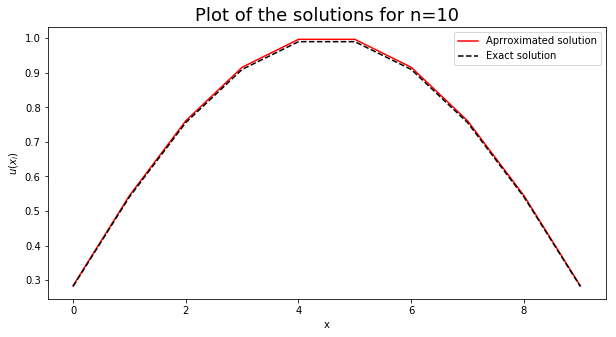

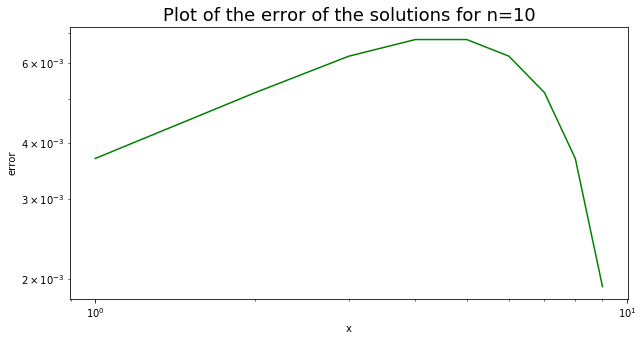

Maximum error : 0.0067555904783


In [11]:
n=10
x=np.arange(0, n)

#plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x, approx(f,n), color='red', label='Aprroximated solution')
plt.plot(x, exact(F,n), color='black', linestyle='--', label='Exact solution')
plt.xlabel('x')
plt.title('Plot of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('$u(x_i)$')
plt.legend(fontsize=10)
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.loglog(x, abs(exact(F,n)-approx(f,n)), color='green')
plt.xlabel('x')
plt.title('Plot of the error of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('error')
plt.show()

print('Maximum error :',max(abs(exact(F,n)-approx(f,n))))

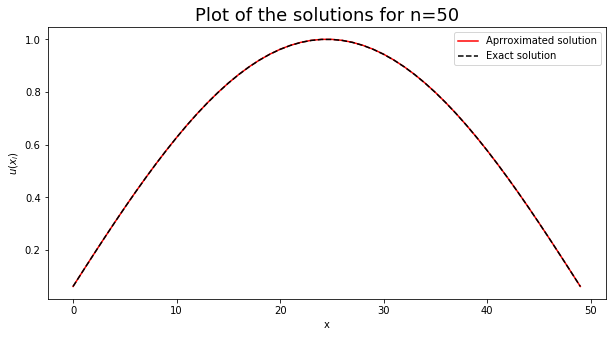

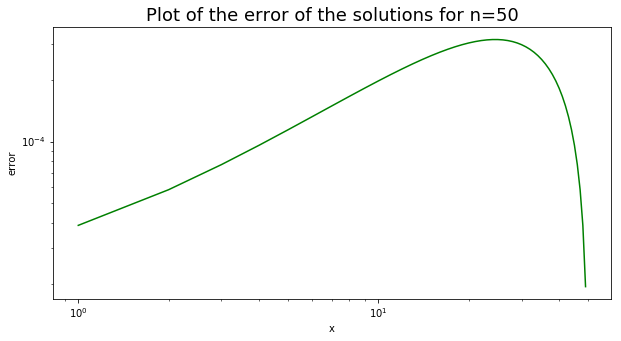

Maximum error : 0.00031612185594


In [12]:
n=50
x=np.arange(0, n)

#plot
fig = plt.figure(figsize=(10, 5))
plt.plot(x, approx(f,n), color='red', label='Aprroximated solution')
plt.plot(x, exact(F,n), color='black', linestyle='--', label='Exact solution')
plt.xlabel('x')
plt.title('Plot of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('$u(x_i)$')
plt.legend(fontsize=10)
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.loglog(x, abs(exact(F,n)-approx(f,n)), color='green')
plt.xlabel('x')
plt.title('Plot of the error of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('error')
plt.show()

print('Maximum error :',max(abs(exact(F,n)-approx(f,n))))

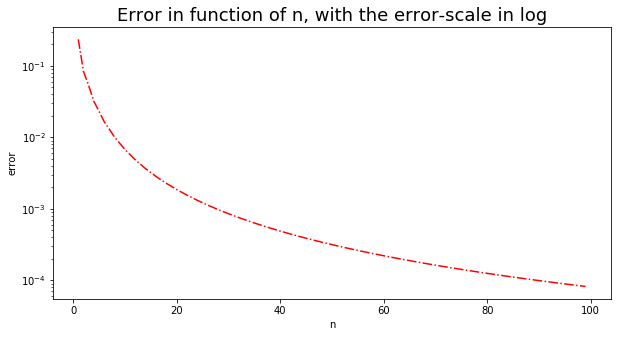

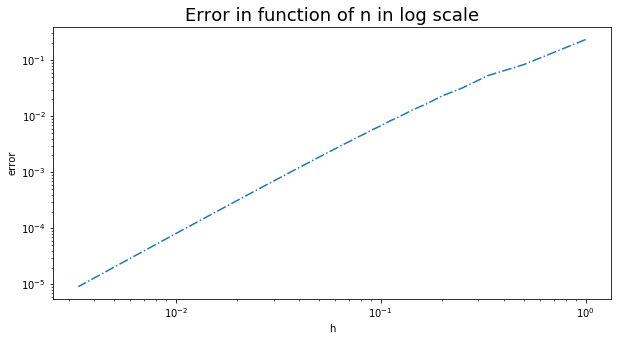

In [13]:
final=[]
n=100
tabn=np.arange(1, n)
for i in range(1,n): final.append(max(abs(exact(F,i)-approx(f,i))))
fig = plt.figure(figsize=(10, 5))
plt.plot(tabn, final, color='red', linestyle='-.')
plt.xlabel('n')
plt.title('Error in function of n, with the error-scale in log', fontsize = 18)  
plt.ylabel('error')
plt.yscale('log')
plt.show()

final=[]
n=300
tabn=np.arange(1, n)
for i in range(1,n): final.append(max(abs(exact(F,i)-approx(f,i))))
fig = plt.figure(figsize=(10, 5))
plt.loglog(1/tabn, final, linestyle='-.')
plt.xlabel('h')
plt.title('Error in function of n in log scale', fontsize = 18)  
plt.ylabel('error')
plt.show()

<div  markdown=1 class="Rmk"> We can thus see on the first graph that as n gets bigger, the error tends to 0. We can also see on the second graph that the order of convergence is 1. We thus have $e(h) \sim Ch^1$

### Local source term

In [14]:
def f2(x):
    y=0
    for i in range(n):
        if 0.35<=x<=0.65:
            y=1
    return y

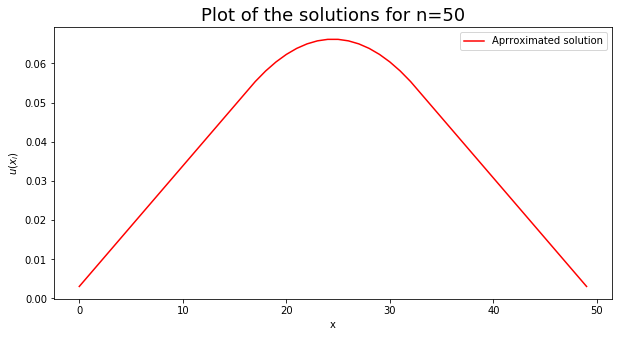

In [15]:


n=50
x=np.arange(0, n)

#plot
fig = plt.figure(figsize=(10, 5))
a=1
plt.plot(x, approx(f2,n), color='red', label='Aprroximated solution')
plt.xlabel('x')
plt.title('Plot of the solutions for n='+str(n), fontsize = 18)  
plt.ylabel('$u(x_i)$')
plt.legend(fontsize=10)
plt.show()

<a id="convection"></a>
## Convection-diffusion equation

### Discretization

<div  markdown=1 class="Rmk">

Justification of the approximation:

To do so, we only need to demonstrate the following:
$u''(x_i) \approx \frac{u_{i+1}-2u_i + u_{i-1}}{h^2}$.
$u'(x_i) \approx \frac{u(x_i) - u(x_i - h)}{h}$
$u'(x_i) \approx \frac{u(x_i+h) - u(x_i - h)}{2h}$

We already know that:

 $u''(x_i) \approx \frac{u_{i+1}-2u_i + u_{i-1}}{h^2}$.

So we only need to show that :

$$u'(x_i) \approx \frac{u(x_i) - u(x_i - h)}{h}                    \quad\quad\quad\quad(1)$$ 

and also (for the 2nd sheme ) that:

$$u'(x_i) \approx \frac{u(x_i+h) - u(x_i - h)}{2h}                \quad\quad\quad(2)$$



This is easily proved using the first lectures notes' following illustration:

<img src="figures/deriv.jpg" alt="Zuse" style="width: 4000px;"/>

In fact, this shows us that for an extremely small $h$, both slope of secant $2$ and slope of secant $3$ approximate the slope of the tangente, which is our $u'(x_i)$. And so, we have proved $(1)$ and $(2)$.


<div  markdown=1 class="Rmk">
We search for two matrices A and B in order to determine the vector U. For the first scheme we thus have:

$$
U=
\begin{pmatrix}
u_1 \\
\vdots \\
u_N\\
\end{pmatrix}
$$

$$
A=
 \begin{bmatrix}
    -\frac{V}{h} -\frac{a}{h^2} & \frac{V}{h} + \frac{2a}{h^2} & - \frac{a}{h^2} & 0 & 0& ... & 0 & 0 \\
    0&-\frac{V}{h} -\frac{a}{h^2} & \frac{V}{h} + \frac{2a}{h^2} & - \frac{a}{h^2}  & 0 & ... & 0 & 0\\
    0&0&-\frac{V}{h} -\frac{a}{h^2} & \frac{V}{h} + \frac{2a}{h^2} & - \frac{a}{h^2}  &... & 0 & 0\\
    & & & & &\vdots \\
    \end{bmatrix}
$$

$$
B=
\begin{pmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_N)\\
\end{pmatrix}
$$


For the second scheme we thus have:

$$
U=
\begin{pmatrix}
u_1 \\
\vdots \\
u_N\\
\end{pmatrix}
$$

$$
A=
 \begin{bmatrix}
    -\frac{V}{2h} -\frac{a}{h^2} & \frac{2a}{h^2} & \frac{V}{2h} - \frac{a}{h^2} & 0 & 0& ... & 0 & 0 &0 & 0\\
    0&-\frac{V}{2h} -\frac{a}{h^2} & \frac{2a}{h^2} & \frac{V}{2h} - \frac{a}{h^2}  & 0 & ... & 0 & 0 &0 & 0\\
    0&0&-\frac{V}{2h} -\frac{a}{h^2} & \frac{2a}{h^2} & \frac{V}{2h} - \frac{a}{h^2}  &... & 0 & 0 &0 & 0\\
    & & & & &\vdots \\
       \end{bmatrix}
$$

$$
B=
\begin{pmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
\end{pmatrix}
$$

<div  markdown=1 class="Rmk">
We search for two matrices A and B in order to determine the vector U. 

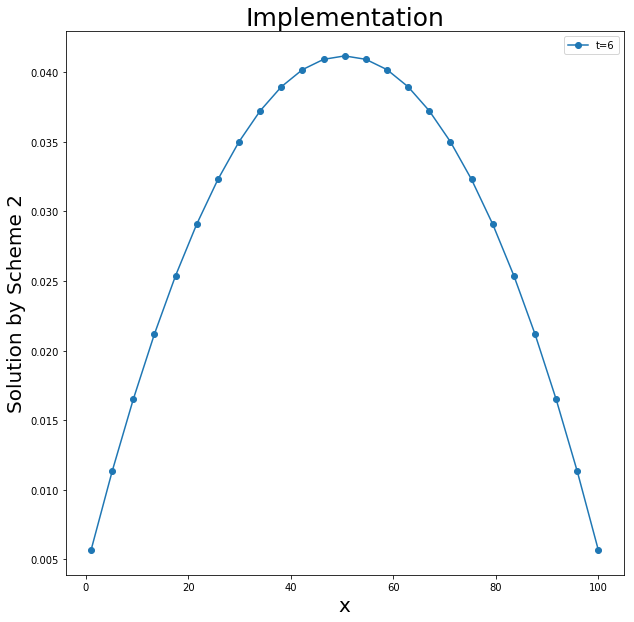

In [22]:
### matrix A scheme 2

def A(N,V,a):
    h = 1/(N+1)
    diag_1 = np.zeros(N)
    diag_2 = np.zeros(N-1)
    diag_3 = np.zeros(N-1)
    for i in range(N):
        diag_1[i] = 2*a/h**2
    for i in range(N-1):
        diag_2[i] = (V/2*h) - (a/h**2) 
    for i in range(N-1):    
        diag_3[i] = (-V/2*h) - (a/h**2)
    A_1 = np.diag(diag_1)
    A_2 = np.diag(diag_2, 1)
    A_3 = np.diag(diag_3, -1)
    res_mat = A_1 + A_2 + A_3
   # res_mat[0][0] = 1
 #   res_mat[N-1][N-1] = 1
  #  res_mat[N-1][N-2] = 0
   # res_mat[0][1] = 0
    return res_mat

def B(N):
    res_vect = np.ones(N)
    res_vect[0] = 0
    res_vect[N-1]  = 0
    return res_vect

u_vect = np.linalg.solve(A(25,2,3), B(25))
tab_x = np.linspace(1,100,25)

fig = plt.figure(figsize=(10,10))
plt.plot(tab_x,u_vect, marker = "o", label = "t=6")
plt.title("Implementation", fontsize = 25)
plt.ylabel('Solution by Scheme 2', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [24]:
def A1(N,V,a):
    h = 1/(N+1)
    diag_1 = np.zeros(N)
    diag_2 = np.zeros(N-1)
    diag_3 = np.zeros(N-2)
    for i in range(N):
        diag_1[i] = -(V/h)-(a/h**2)
    for i in range(N-1):
        diag_2[i] = (V/h) - (a/h**2) 
    for i in range(N-1):    
        diag_3[i] = - (a/h**2)
    A_1 = np.diag(diag_1)
    A_2 = np.diag(diag_2, -1)
    A_3 = np.diag(diag_3, -2)
    res_mat = A_1 + A_2 + A_3
   # res_mat[0][0] = 1
 #   res_mat[N-1][N-1] = 1
  #  res_mat[N-1][N-2] = 0
   # res_mat[0][1] = 0
    return res_mat

def B1(N):
    res_vect = np.ones(N)
    res_vect[0] = 0
    res_vect[N-1]  = 0
    return res_vect

u_vect = np.linalg.solve(A1(25,2,3), B1(25))
tab_x = np.linspace(1,100,25)

fig = plt.figure(figsize=(10,10))
plt.plot(tab_x,u_vect, marker = "o", label = "t=6")
plt.title("Implementation", fontsize = 25)
plt.ylabel('Solution by Scheme 2', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

IndexError: index 23 is out of bounds for axis 0 with size 23

### Local source term

### Free outlet boundary condition

<a id="other"></a>
## Other ideas...

In [17]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()